## <span style="color : green">Exploratory Data Analysis 

# <center> Table of Contents </center>

1. Find categorical and numerical using numpy
2. Five number summary
1. box plot
1. Outliers with z-score
1. Correlation between independent variables with dependent variable
1. Skewness and its plot
1. Univariate, bivariate and multivariate plot

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Find categorical and numerical using numpy

In [46]:
df = pd.read_csv('data/Iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
numeric_data = df.select_dtypes(include=np.number)
numeric_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [49]:
categorical = df.select_dtypes(include=np.object)
categorical.head()

,Species
Id,
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa


# Five number summary


| 1st Quartile | Medium | 3rd Quartile | Minimum | Maximum |
| ------------ | ------ |  --| ------ |---- |

In [50]:
_1quart =  np.quantile(numeric_data, 0.25)
median = np.quantile(numeric_data, 0.5)
_3quart =  np.quantile(numeric_data, 0.75)

print(f'1st Quartile - {_1quart}')
print(f'2nd Quartile - {median}')
print(f'3rd Quartile - {_3quart}')


1st Quartile - 1.7
2nd Quartile - 3.2
3rd Quartile - 5.1


In [51]:
np.min(numeric_data)

SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
dtype: float64

In [52]:
np.max(numeric_data)

SepalLengthCm    7.9
SepalWidthCm     4.4
PetalLengthCm    6.9
PetalWidthCm     2.5
dtype: float64

# box plot

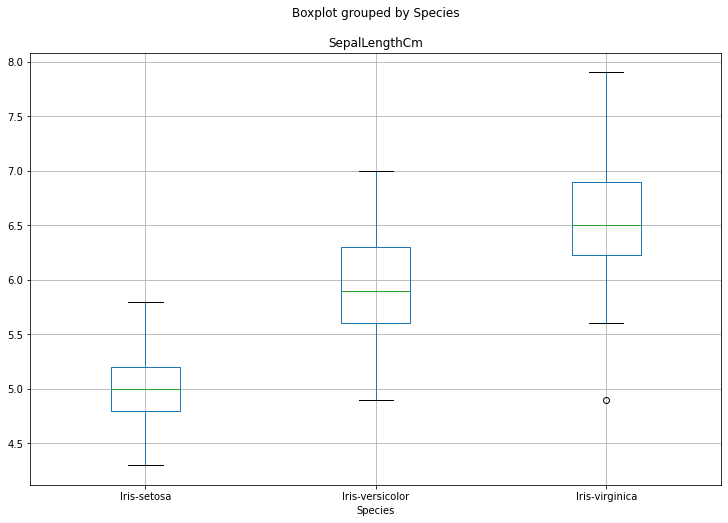

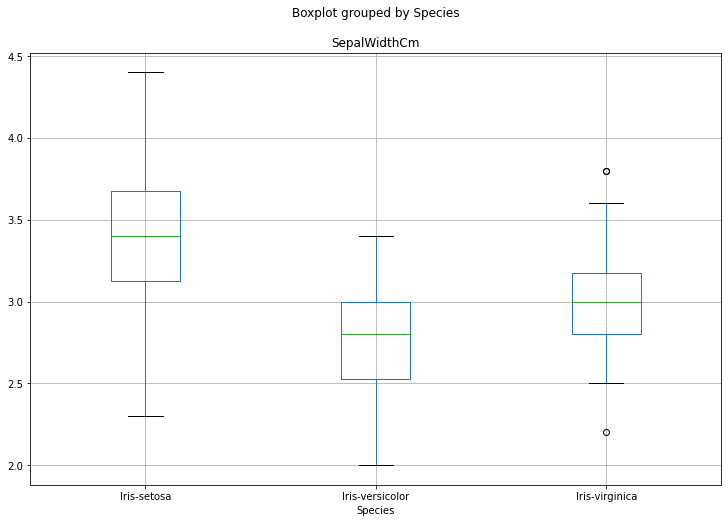

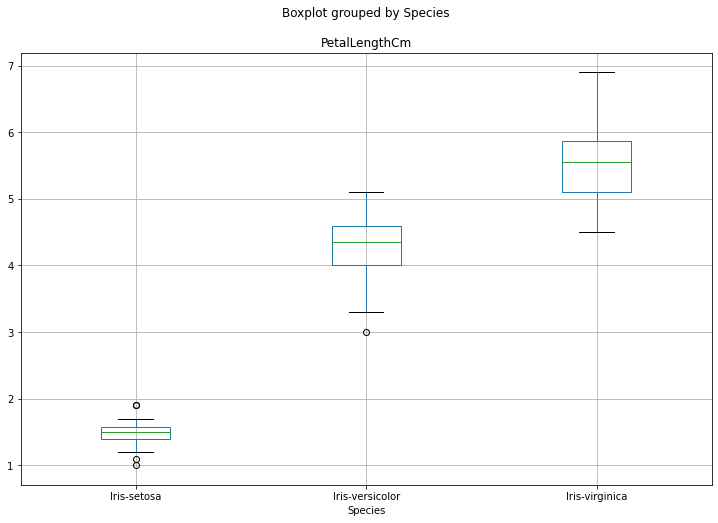

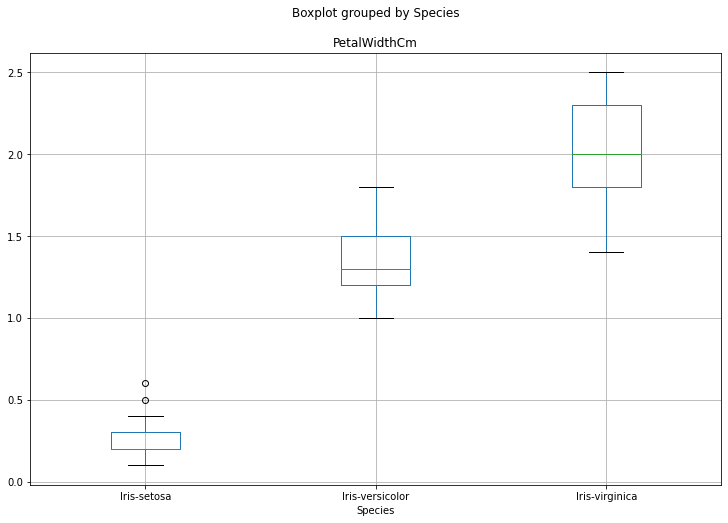

In [53]:
features = [ x for x in df.columns if x != 'Species']

for attr in features :
    df.boxplot(column=attr, by='Species', figsize=(12,8))

# Outliers with z-score

In [54]:
from scipy.stats import zscore

z_scores = numeric_data.apply(zscore)

In [56]:
threshold = 3  # Denotes the 3 to -3 

df_no_outliers = numeric_data[((z_scores < threshold) & (z_scores > - threshold)).all(axis=1)]


In [57]:
print("Original Dataframe:")
print(numeric_data.shape)

Original Dataframe:
(150, 4)


In [58]:
numeric_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [59]:
print("\nDataframe with Outliers Filtered:")
print(df_no_outliers.shape)


Dataframe with Outliers Filtered:
(149, 4)


In [60]:
df_no_outliers.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


# Correlation between independent variables with dependent variable

In [69]:
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

corr = df.corr(method='pearson')
corr['Species'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
Name: Species, dtype: float64>

# Skewness and its plot

In [61]:
data_skew = df.skew()
skew_index = list(data_skew.index)
skew_values = list(data_skew.values)
skew_arr = [[x] for x in skew_index]


In [ ]:
for i in range(len(skew_arr)):
    skew_arr[i].append(skew_values[i])

# Univariate, bivariate and multivariate plot